<a href="https://colab.research.google.com/github/laolucharles1/Data-Analytics-Machine-Learning-Projects/blob/main/Visualizing_intermediate_Convet_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Visualizing intermediate Convet Outputs

Visualizing intermediate Convet Outputs: Useful for understanding how successive convet layers transform their inout, and forgetting a first idea of the meaning of individual convet filters

In [ ]:
#Instantiatiing a small convet for dogs vs cats classification
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

Preprocessing a single image

In [ ]:
# Configuring the model for training
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['accuracy'])

In [ ]:
# Using ImageDatagenerator to read images from Directories

train_dir = '/content/drive/MyDrive/kaggle_original_data/train'
test_dir = '/content/drive/MyDrive/kaggle_original_data/test'
validation_dir = '/content/drive/MyDrive/kaggle_original_data/validation'


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                             epochs = 30,
                             validation_data = validation_generator)

model.save('cats_and_dogs_step_1')

<ipython-input-10-dbbaf5945022>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 551s 5s/step - loss: 0.7009 - accuracy: 0.4945 - val_loss: 0.6922 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 0.6926 - accuracy: 0.5365 - val_loss: 0.6781 - val_accuracy: 0.5760
Epoch 3/30
100/100 [==============================] - 117s 1s/step - loss: 0.6732 - accuracy: 0.5845 - val_loss: 0.6339 - val_accuracy: 0.6300
Epoch 4/30
100/100 [==============================] - 150s 1s/step - loss: 0.6401 - accuracy: 0.6585 - val_loss: 0.6109 - val_accuracy: 0.6550
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5872 - accuracy: 0.6900 - val_loss: 0.6095 - val_accuracy: 0.6780
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5339 - accuracy: 0.7275 - val_loss: 0.5827 - val_accuracy: 0.6970
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 0.4684 - accuracy: 0.7615 - val_loss: 0.6023 - val_accuracy: 0.6920

Preprocessing a single image

In [ ]:
img_path = "/content/drive/MyDrive/kaggle_original_data/test/cats/cat.1700.jpg"

from keras.preprocessing import image #preprocesses the image into a 4D tensor
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


Displaying the test picture

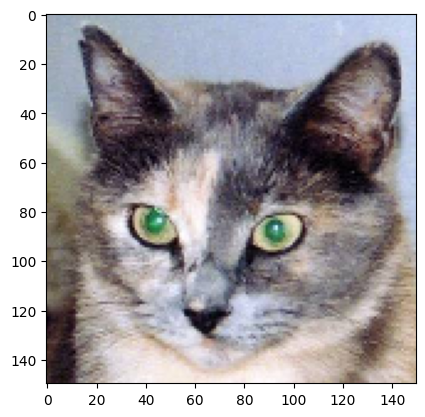

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

Instantiating a model from an input tensor and a list of output tensors

In [ ]:
from keras import models

layers_outputs = [layer.output for layer in model.layers[:8]] # This extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs = layers_outputs) # this creates a model that will return these outputs given the model input

Running the model in predict mode

In [ ]:
activations = activation_model.predict(img_tensor) # returns a list of five Numpy arrays: one array per layer activation
first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 155ms/step
(1, 148, 148, 32)


Visualizing the fourth channel

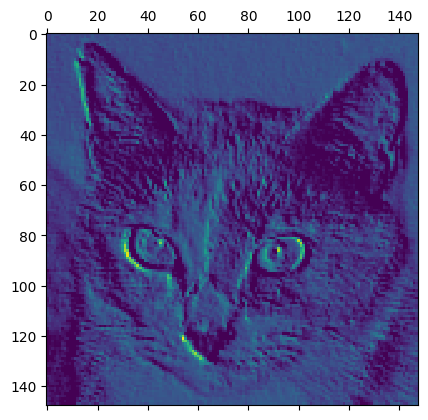

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Visualizing the seventh channel

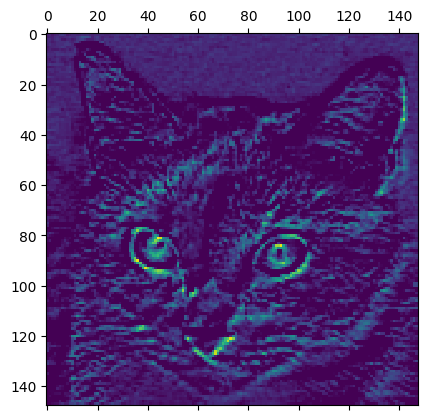

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

<ipython-input-27-cd8fee2bd461>:20: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


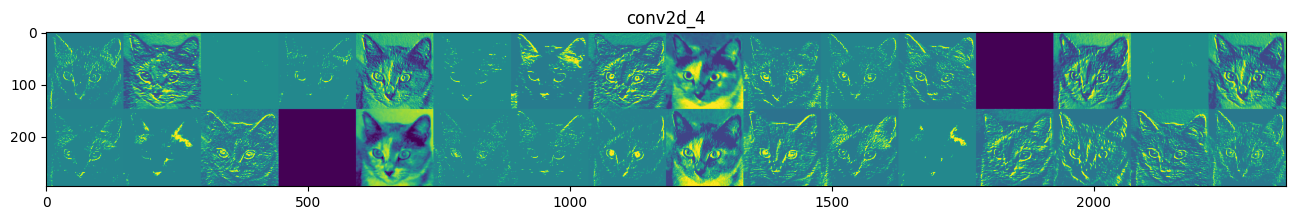

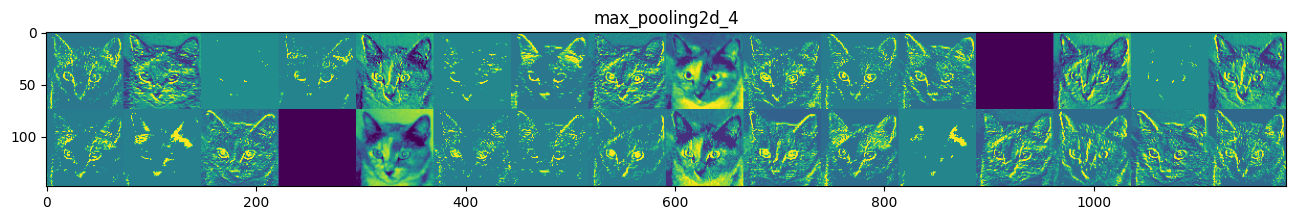

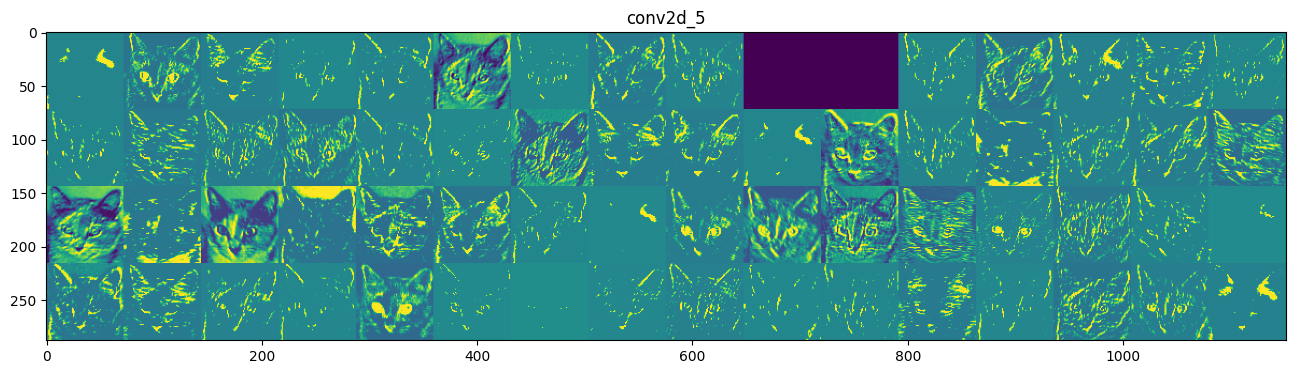

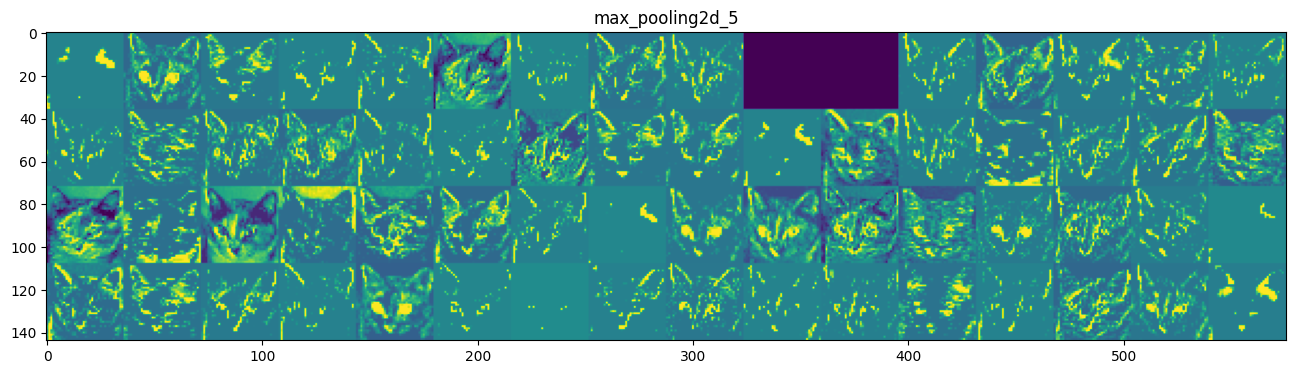

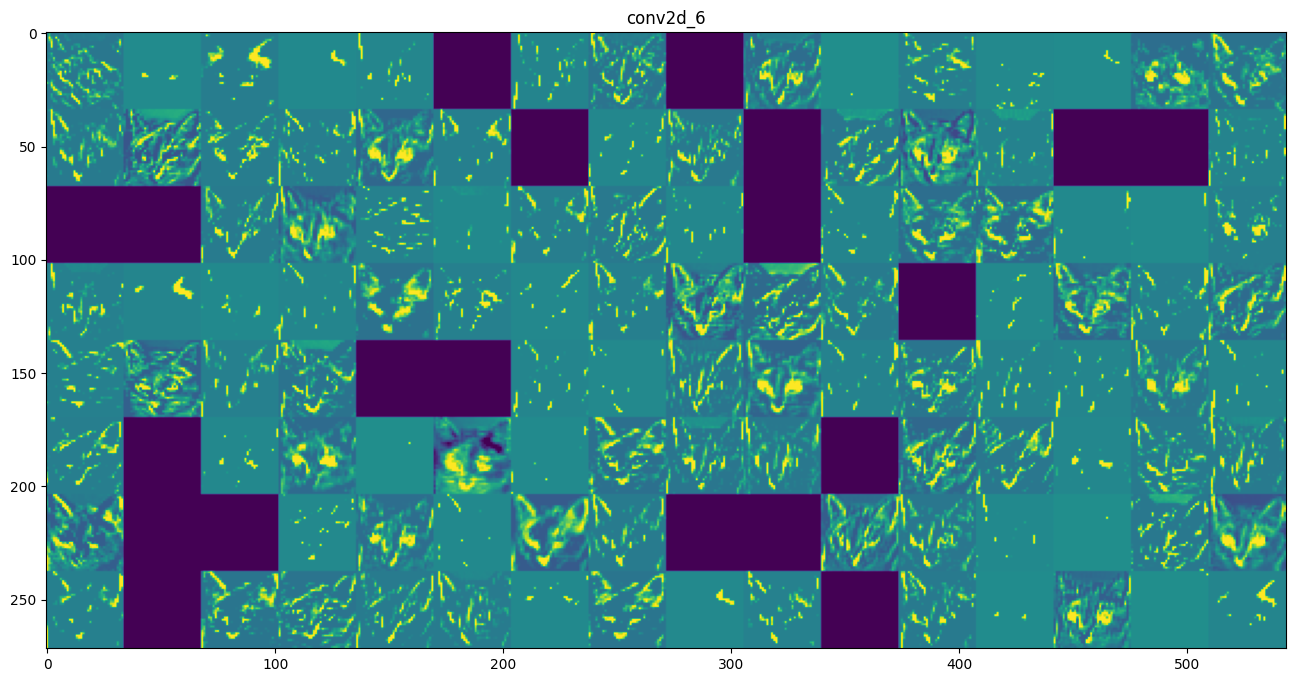

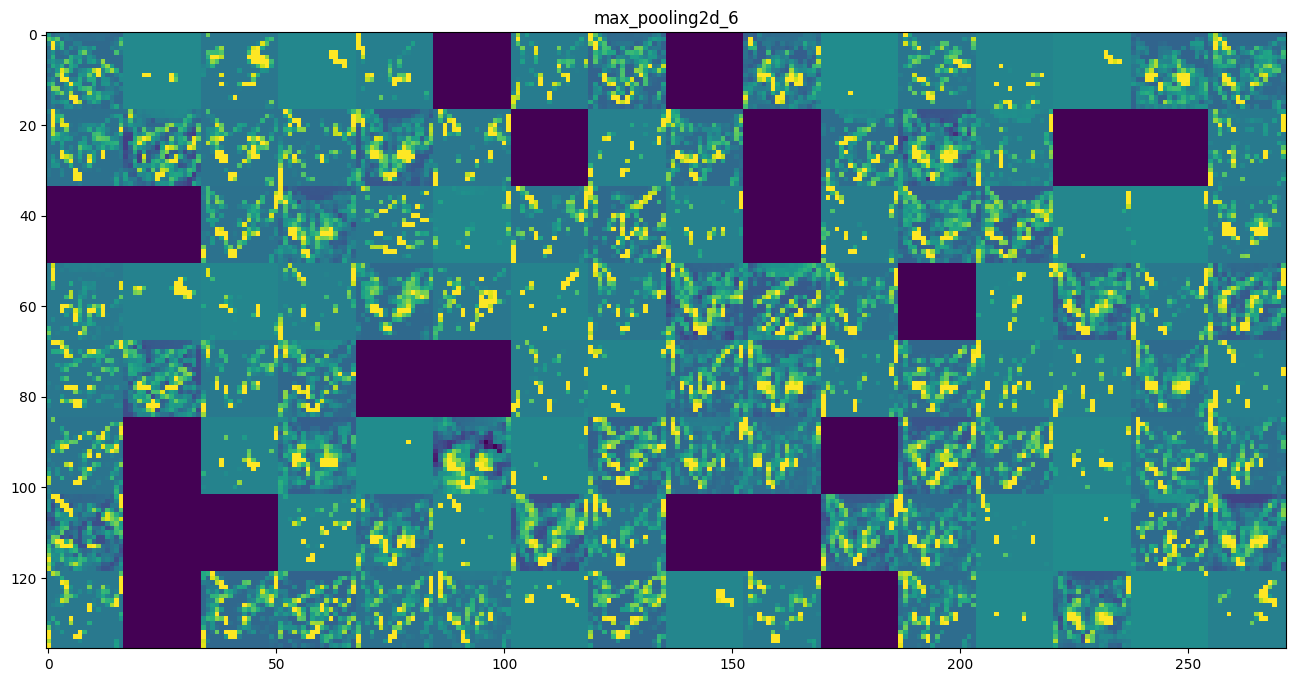

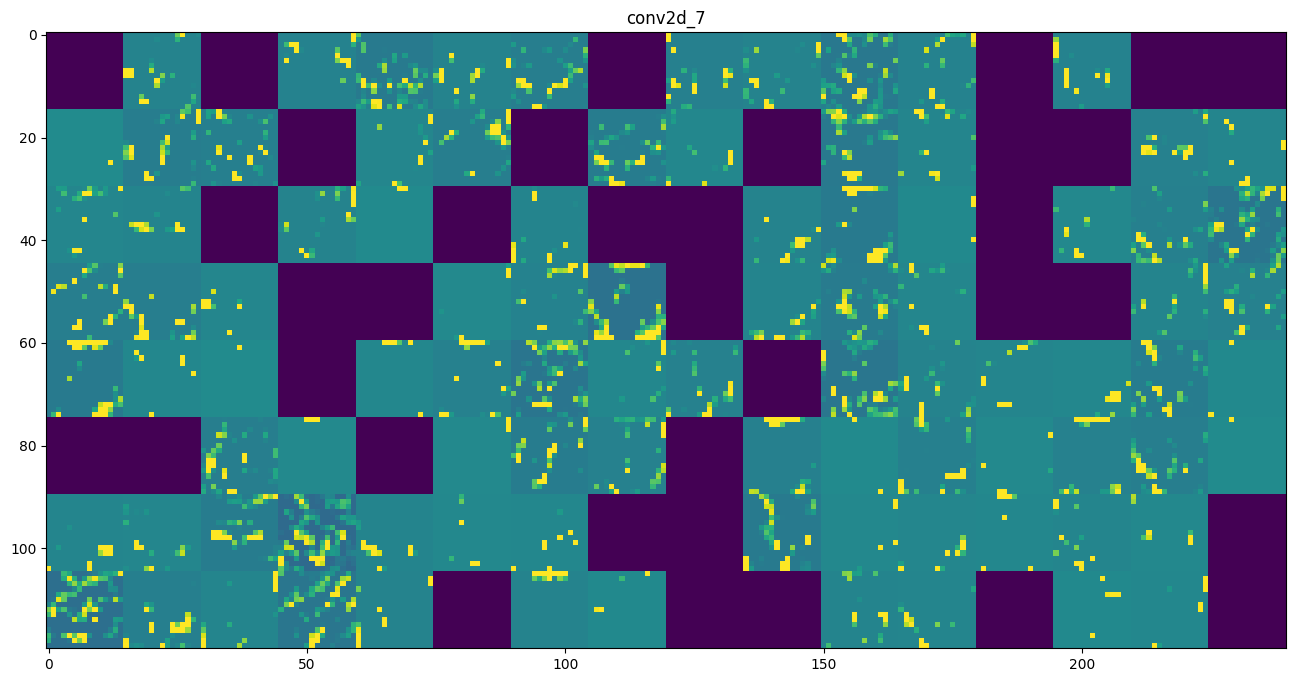

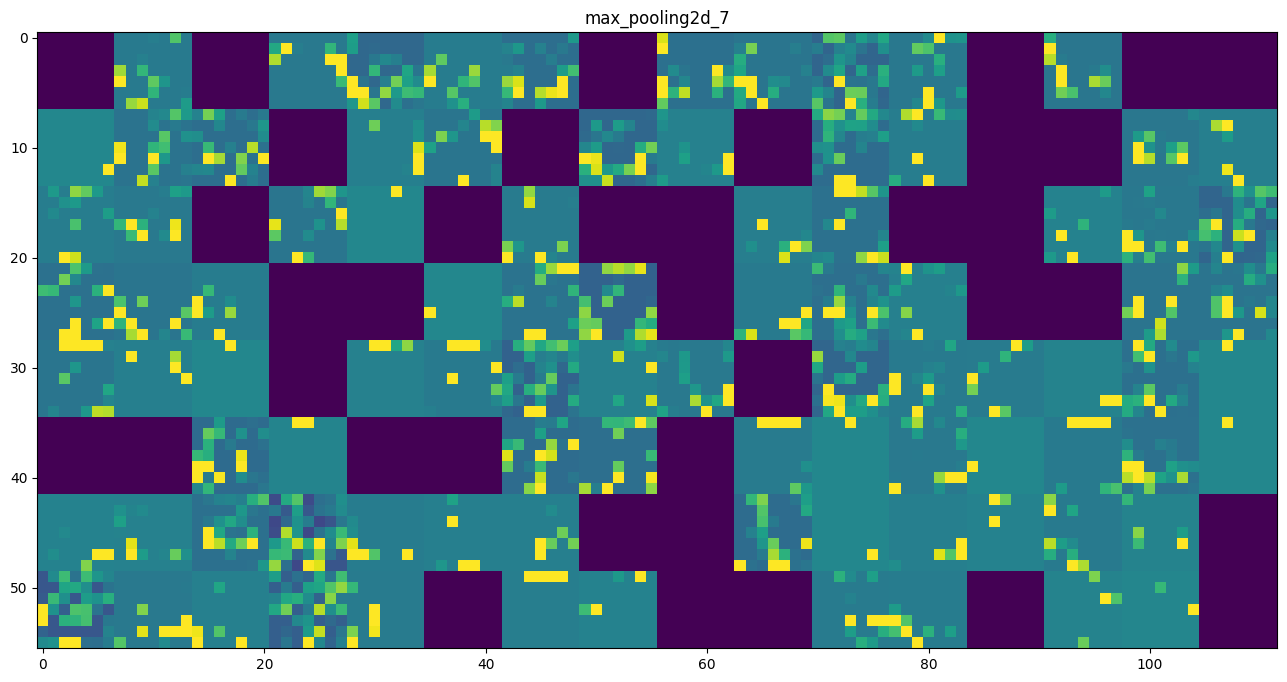

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name) #Names of the layers, so you can have them as a part of the plot

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): #Displays the feature maps
  n_features = layer_activation.shape[-1] #number of features in the feature map

  size = layer_activation.shape[1] #the feature map has (l, size, size, n_features)

  n_cols = n_features // images_per_row #tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size)) #tiles each filter into a big horizontal grid

  for col in range(n_cols):
     for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

